In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, make_scorer, precision_score, recall_score, f1_score, roc_auc_score, mean_squared_error, r2_score, mean_absolute_error
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, cross_val_predict, GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


# 2. Carga y Exploración Inicial de Datos:
* Descargar el dataset de la competencia.
* Realizar una exploración inicial para entender la estructura del dataset y las características disponibles.
* Identificar y documentar valores faltantes y outliers.

In [73]:
ruta='../data/train.csv'
df = pd.read_csv(filepath_or_buffer=ruta,sep=',')
df.shape

(3960, 82)

In [74]:
df.head()

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
df.columns

Index(['id', 'Basic_Demos-Enroll_Season', 'Basic_Demos-Age', 'Basic_Demos-Sex',
       'CGAS-Season', 'CGAS-CGAS_Score', 'Physical-Season', 'Physical-BMI',
       'Physical-Height', 'Physical-Weight', 'Physical-Waist_Circumference',
       'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP',
       'Fitness_Endurance-Season', 'Fitness_Endurance-Max_Stage',
       'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec',
       'FGC-Season', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_GSND',
       'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone', 'FGC-FGC_PU',
       'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR',
       'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone', 'BIA-Season',
       'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI',
       'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM',
       'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num',
       'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST'

In [76]:
columnas_relevantes = [
    'Basic_Demos-Age', 'Basic_Demos-Sex', 'Physical-BMI', 'Physical-Height', 
    'Physical-Weight', 'Physical-Waist_Circumference', 'Physical-Diastolic_BP', 
    'Physical-HeartRate', 'Physical-Systolic_BP', 'Fitness_Endurance-Max_Stage', 
    'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec', 'FGC-FGC_CU', 
    'FGC-FGC_CU_Zone', 'FGC-FGC_GSND', 'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD', 
    'FGC-FGC_GSD_Zone', 'FGC-FGC_PU', 'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 
    'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR', 'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 
    'FGC-FGC_TL_Zone', 'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI', 
    'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM', 'BIA-BIA_FFMI', 
    'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num', 'BIA-BIA_ICW', 'BIA-BIA_LDM', 
    'BIA-BIA_LST', 'BIA-BIA_SMM', 'BIA-BIA_TBW', 'PAQ_A-PAQ_A_Total', 
    'PAQ_C-PAQ_C_Total', 'PCIAT-PCIAT_01', 'PCIAT-PCIAT_02', 'PCIAT-PCIAT_03', 
    'PCIAT-PCIAT_04', 'PCIAT-PCIAT_05', 'PCIAT-PCIAT_06', 'PCIAT-PCIAT_07', 
    'PCIAT-PCIAT_08', 'PCIAT-PCIAT_09', 'PCIAT-PCIAT_10', 'PCIAT-PCIAT_11', 
    'PCIAT-PCIAT_12', 'PCIAT-PCIAT_13', 'PCIAT-PCIAT_14', 'PCIAT-PCIAT_15', 
    'PCIAT-PCIAT_16', 'PCIAT-PCIAT_17', 'PCIAT-PCIAT_18', 'PCIAT-PCIAT_19', 
    'PCIAT-PCIAT_20', 'PCIAT-PCIAT_Total', 'SDS-SDS_Total_Raw', 'SDS-SDS_Total_T', 
    'PreInt_EduHx-computerinternet_hoursday', 'sii'
]
df = df[columnas_relevantes]

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 69 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Basic_Demos-Age                         3960 non-null   int64  
 1   Basic_Demos-Sex                         3960 non-null   int64  
 2   Physical-BMI                            3022 non-null   float64
 3   Physical-Height                         3027 non-null   float64
 4   Physical-Weight                         3076 non-null   float64
 5   Physical-Waist_Circumference            898 non-null    float64
 6   Physical-Diastolic_BP                   2954 non-null   float64
 7   Physical-HeartRate                      2967 non-null   float64
 8   Physical-Systolic_BP                    2954 non-null   float64
 9   Fitness_Endurance-Max_Stage             743 non-null    float64
 10  Fitness_Endurance-Time_Mins             740 non-null    floa

In [78]:
df.isnull().sum()

Basic_Demos-Age                              0
Basic_Demos-Sex                              0
Physical-BMI                               938
Physical-Height                            933
Physical-Weight                            884
                                          ... 
PCIAT-PCIAT_Total                         1224
SDS-SDS_Total_Raw                         1351
SDS-SDS_Total_T                           1354
PreInt_EduHx-computerinternet_hoursday     659
sii                                       1224
Length: 69, dtype: int64

In [79]:
# Identificación y documentación de valores faltantes 

# Mostrar la cantidad de valores nulos por columna
missing_data = df.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_data / len(df)) * 100  # Porcentaje de valores faltantes

# Crear un DataFrame con los valores faltantes y su porcentaje
missing_summary = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_percentage})
print(missing_summary)

                                        Missing Values  Percentage
PAQ_A-PAQ_A_Total                                 3485   88.005051
Fitness_Endurance-Time_Mins                       3220   81.313131
Fitness_Endurance-Time_Sec                        3220   81.313131
Fitness_Endurance-Max_Stage                       3217   81.237374
Physical-Waist_Circumference                      3062   77.323232
...                                                ...         ...
Physical-Height                                    933   23.560606
Physical-Weight                                    884   22.323232
PreInt_EduHx-computerinternet_hoursday             659   16.641414
Basic_Demos-Sex                                      0    0.000000
Basic_Demos-Age                                      0    0.000000

[69 rows x 2 columns]


In [80]:
# deterinamos las columnas numericas e imputamospor la media
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].apply(lambda col: col.fillna(col.mean()))

# Verificar que los valores faltantes han sido imputados
missing_data_after = df.isnull().sum().sort_values(ascending=False)
print(missing_data_after) # mostramos los valores faltantes despues de la imputacion

Basic_Demos-Age    0
PCIAT-PCIAT_01     0
PCIAT-PCIAT_07     0
PCIAT-PCIAT_06     0
PCIAT-PCIAT_05     0
                  ..
BIA-BIA_BMR        0
BIA-BIA_DEE        0
BIA-BIA_ECW        0
BIA-BIA_FFM        0
sii                0
Length: 69, dtype: int64


In [81]:
# Identificación de outliers
def detect_outliers(df, columns):
    outliers = {}  # inicializamos un diccionario vacío para guardar los outliers por columna.
    for col in columns:  # iteramos sobre cada columna especificada en el parámetro 'columns'.
        # calcular el IQR (Inter Quartile Range)
        Q1 = df[col].quantile(0.25)  # calculamos el primer cuartil (Q1) de la columna.
        Q3 = df[col].quantile(0.75)  # calculamos el tercer cuartil (Q3) de la columna.
        IQR = Q3 - Q1  # calculamos el rango intercuartílico (IQR) restando Q1 de Q3.
        
        # definir los límites superior e inferior
        lower_bound = Q1 - 1.5 * IQR  # definimos el límite inferior como Q1 menos 1.5 veces el IQR.
        upper_bound = Q3 + 1.5 * IQR  # definimos el límite superior como Q3 más 1.5 veces el IQR.
        
        # detectar outliers
        outliers_in_col = df[(df[col] < lower_bound) | (df[col] > upper_bound)]  # filtramos los datos fuera de los límites definidos, considerando los outliers.
        
        # guardar los outliers encontrados
        outliers[col] = outliers_in_col  # almacenamos los outliers de la columna en el diccionario 'outliers'.
    
    return outliers  # devolvemos el diccionario con los outliers encontrados en todas las columnas.

In [82]:
# Calcular el número de filas y columnas necesarias para los subgráficos
n_cols = 5  # Número de columnas para los subgráficos
n_rows = int(np.ceil(len(numeric_cols) / n_cols))  # Número de filas necesarias

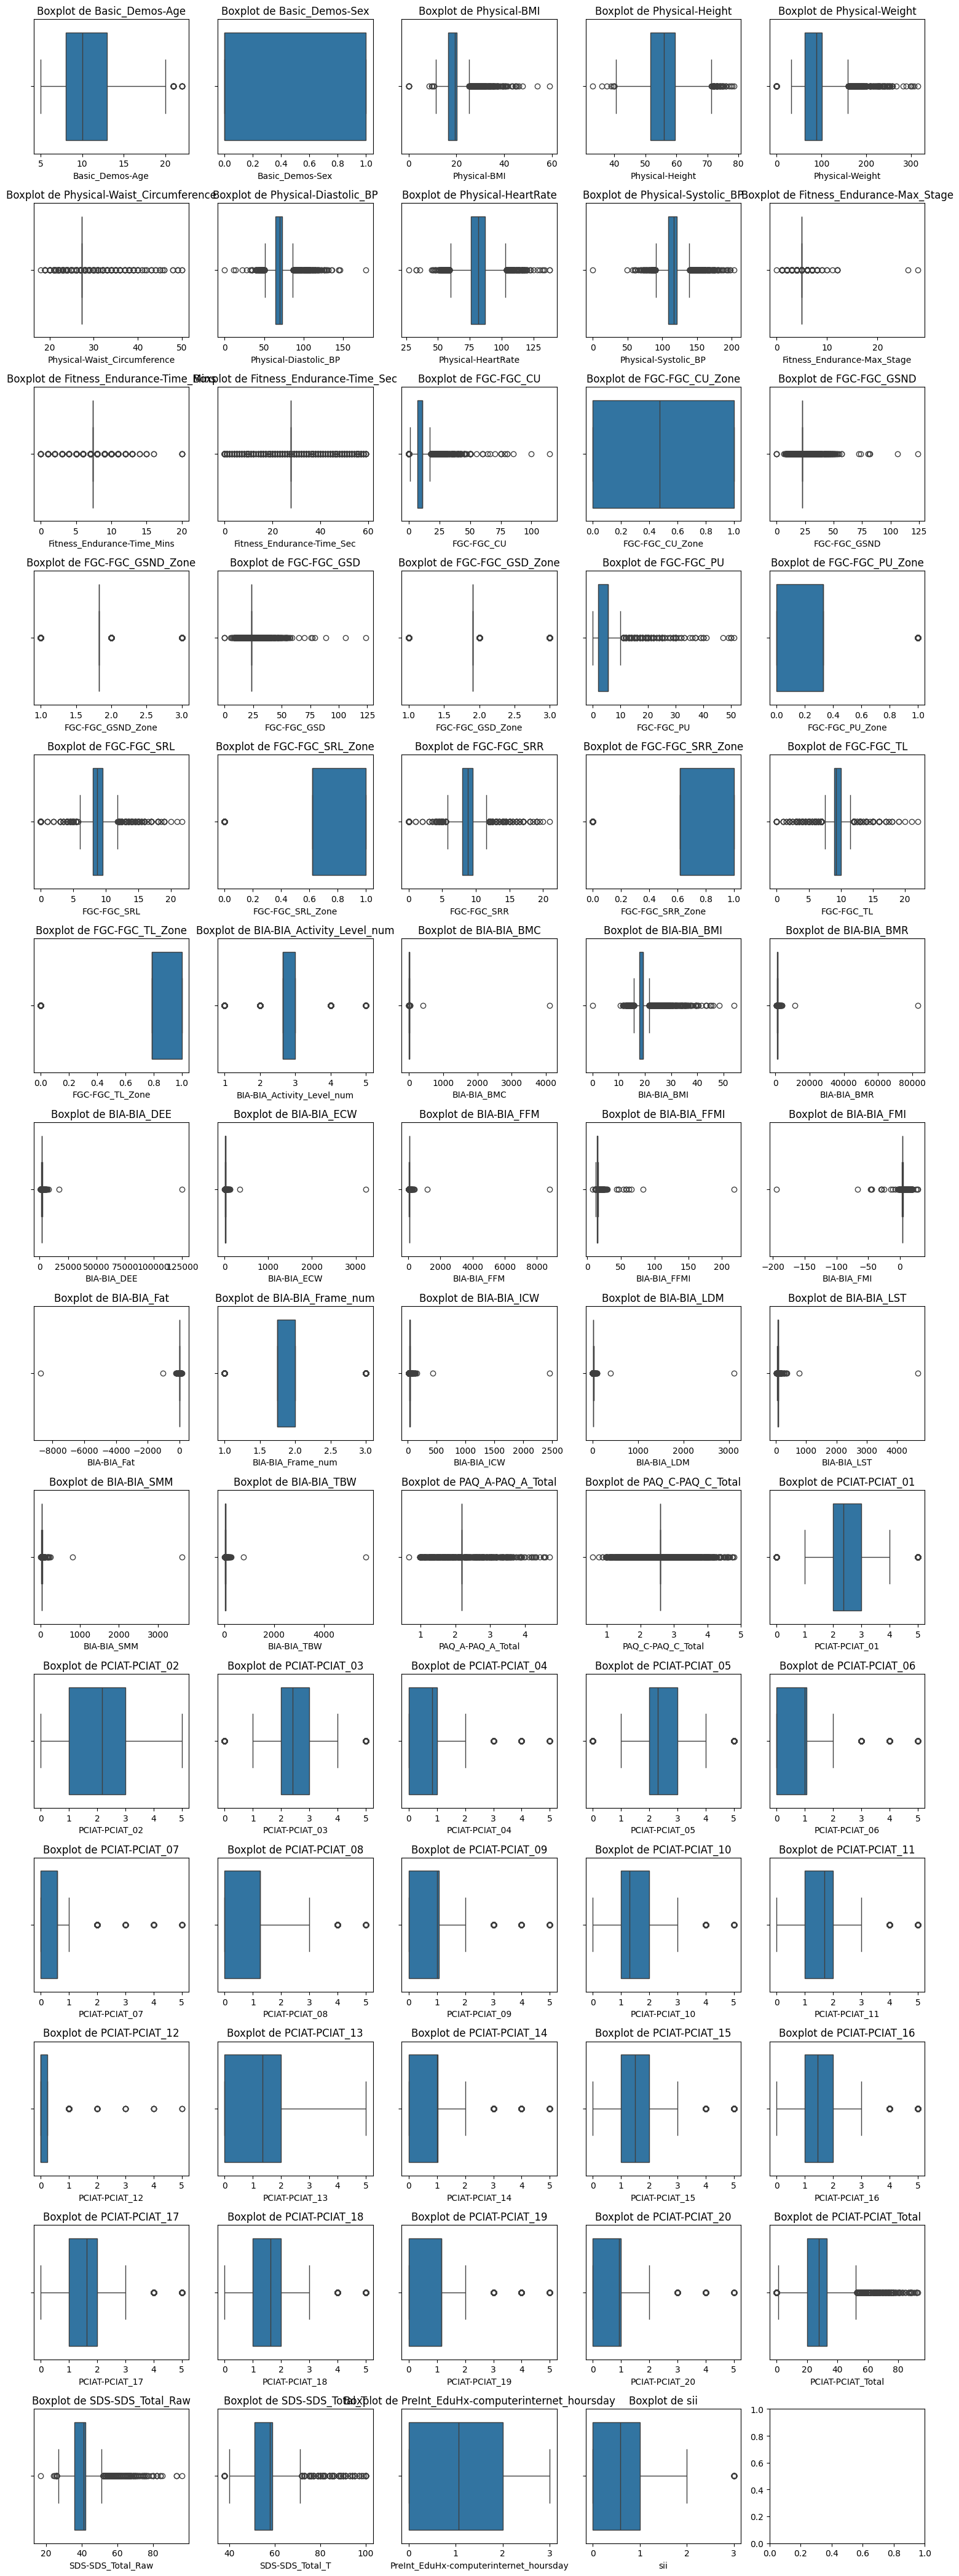

In [83]:
# Crear los Boxplots para cada columna numérica

# crear el gráfico de subgráficos
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 3 * n_rows))  # creamos una figura con subgráficos, usando el número de filas y columnas especificadas.

# aplanar el arreglo de ejes para facilitar la asignación
axes = axes.flatten()  # aplanamos el arreglo 2D de ejes para convertirlo en un arreglo 1D, lo que facilita la asignación de gráficos.

# paso 4: crear los boxplots para cada columna numérica
for i, col in enumerate(numeric_cols):  # iteramos sobre las columnas numéricas.
    sns.boxplot(x=df[col], ax=axes[i])  # creamos un boxplot para cada columna y lo asignamos al eje correspondiente.
    axes[i].set_title(f'Boxplot de {col}')  # establecemos un título para cada gráfico de boxplot.

# ajustar el diseño para que no se sobrepongan los gráficos
plt.tight_layout()  # ajustamos el diseño para evitar que los gráficos se superpongan.
plt.show()  # mostramos el gráfico final.


In [84]:
# detectar outliers y documentarlos
outliers = detect_outliers(df, numeric_cols)  # detectamos los outliers usando la función 'detect_outliers' y los guardamos en 'outliers'.

# documentar los outliers encontrados
for col, outlier_data in outliers.items():  # iteramos sobre los outliers detectados por columna.
    print(f"Outliers en '{col}':")  # imprimimos el nombre de la columna con los outliers.
    print(outlier_data[[col]].head())  # mostramos las primeras filas de los outliers en esa columna.
    print("-" * 50)  # imprimimos una línea de separación para mejorar la legibilidad.

Outliers en 'Basic_Demos-Age':
     Basic_Demos-Age
47                21
65                21
372               21
499               21
521               21
--------------------------------------------------
Outliers en 'Basic_Demos-Sex':
Empty DataFrame
Columns: [Basic_Demos-Sex]
Index: []
--------------------------------------------------
Outliers en 'Physical-BMI':
    Physical-BMI
15     29.315775
18     30.094649
21     29.285856
22     34.187282
48     32.084107
--------------------------------------------------
Outliers en 'Physical-Height':
     Physical-Height
18             37.50
55             74.00
87             77.00
211            71.50
459            75.75
--------------------------------------------------
Outliers en 'Physical-Weight':
    Physical-Weight
21            210.0
22            178.0
44              0.0
48            188.4
55            164.4
--------------------------------------------------
Outliers en 'Physical-Waist_Circumference':
    Physical-Waist_Cir

* No aplicamos ninguna imputación por tratarse de datos médicos qye podrian contener información sensible

# 3. Análisis Exploratorio de Datos (EDA):
* Calcular estadísticas descriptivas básicas.
* Crear visualizaciones para entender la distribución de las variables y sus relaciones.
* Detectar y tratar valores faltantes y outliers.

In [85]:
df.describe() # mostramos una estadistica descriptiva del dataset

,Basic_Demos-Age,Basic_Demos-Sex,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,Fitness_Endurance-Max_Stage,...,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday,sii
count,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,...,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000
mean,10.433586,0.372727,19.331929,55.946713,89.038615,27.278508,69.648951,81.597236,116.983074,4.989233,...,1.452346,1.627890,1.613636,1.158974,0.943652,27.896199,41.088923,57.763622,1.060588,0.580409
std,3.574648,0.483591,4.467224,6.534029,39.279241,2.650007,11.755368,11.827929,14.734967,0.871935,...,1.241267,1.199128,1.269135,1.115575,0.984769,16.904891,8.463275,10.704254,0.999606,0.640928
min,5.000000,0.000000,0.000000,33.000000,0.000000,18.000000,0.000000,27.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,38.000000,0.000000,0.000000
25%,8.000000,0.000000,16.487441,51.700000,62.400000,27.278508,64.000000,76.000000,109.000000,4.989233,...,1.000000,1.000000,1.000000,0.000000,0.000000,20.000000,36.000000,51.000000,0.000000,0.000000
50%,10.000000,0.000000,19.331929,55.946713,89.038615,27.278508,69.648951,81.597236,116.983074,4.989233,...,1.452346,1.627890,1.613636,1.158974,0.943652,27.896199,41.088923,57.763622,1.060588,0.580409
75%,13.000000,1.000000,20.041241,59.500000,101.200000,27.278508,73.000000,87.000000,121.000000,4.989233,...,2.000000,2.000000,2.000000,1.158974,1.000000,33.000000,42.000000,59.000000,2.000000,1.000000
max,22.000000,1.000000,59.132048,78.500000,315.000000,50.000000,179.000000,138.000000,203.000000,28.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,93.000000,96.000000,100.000000,3.000000,3.000000


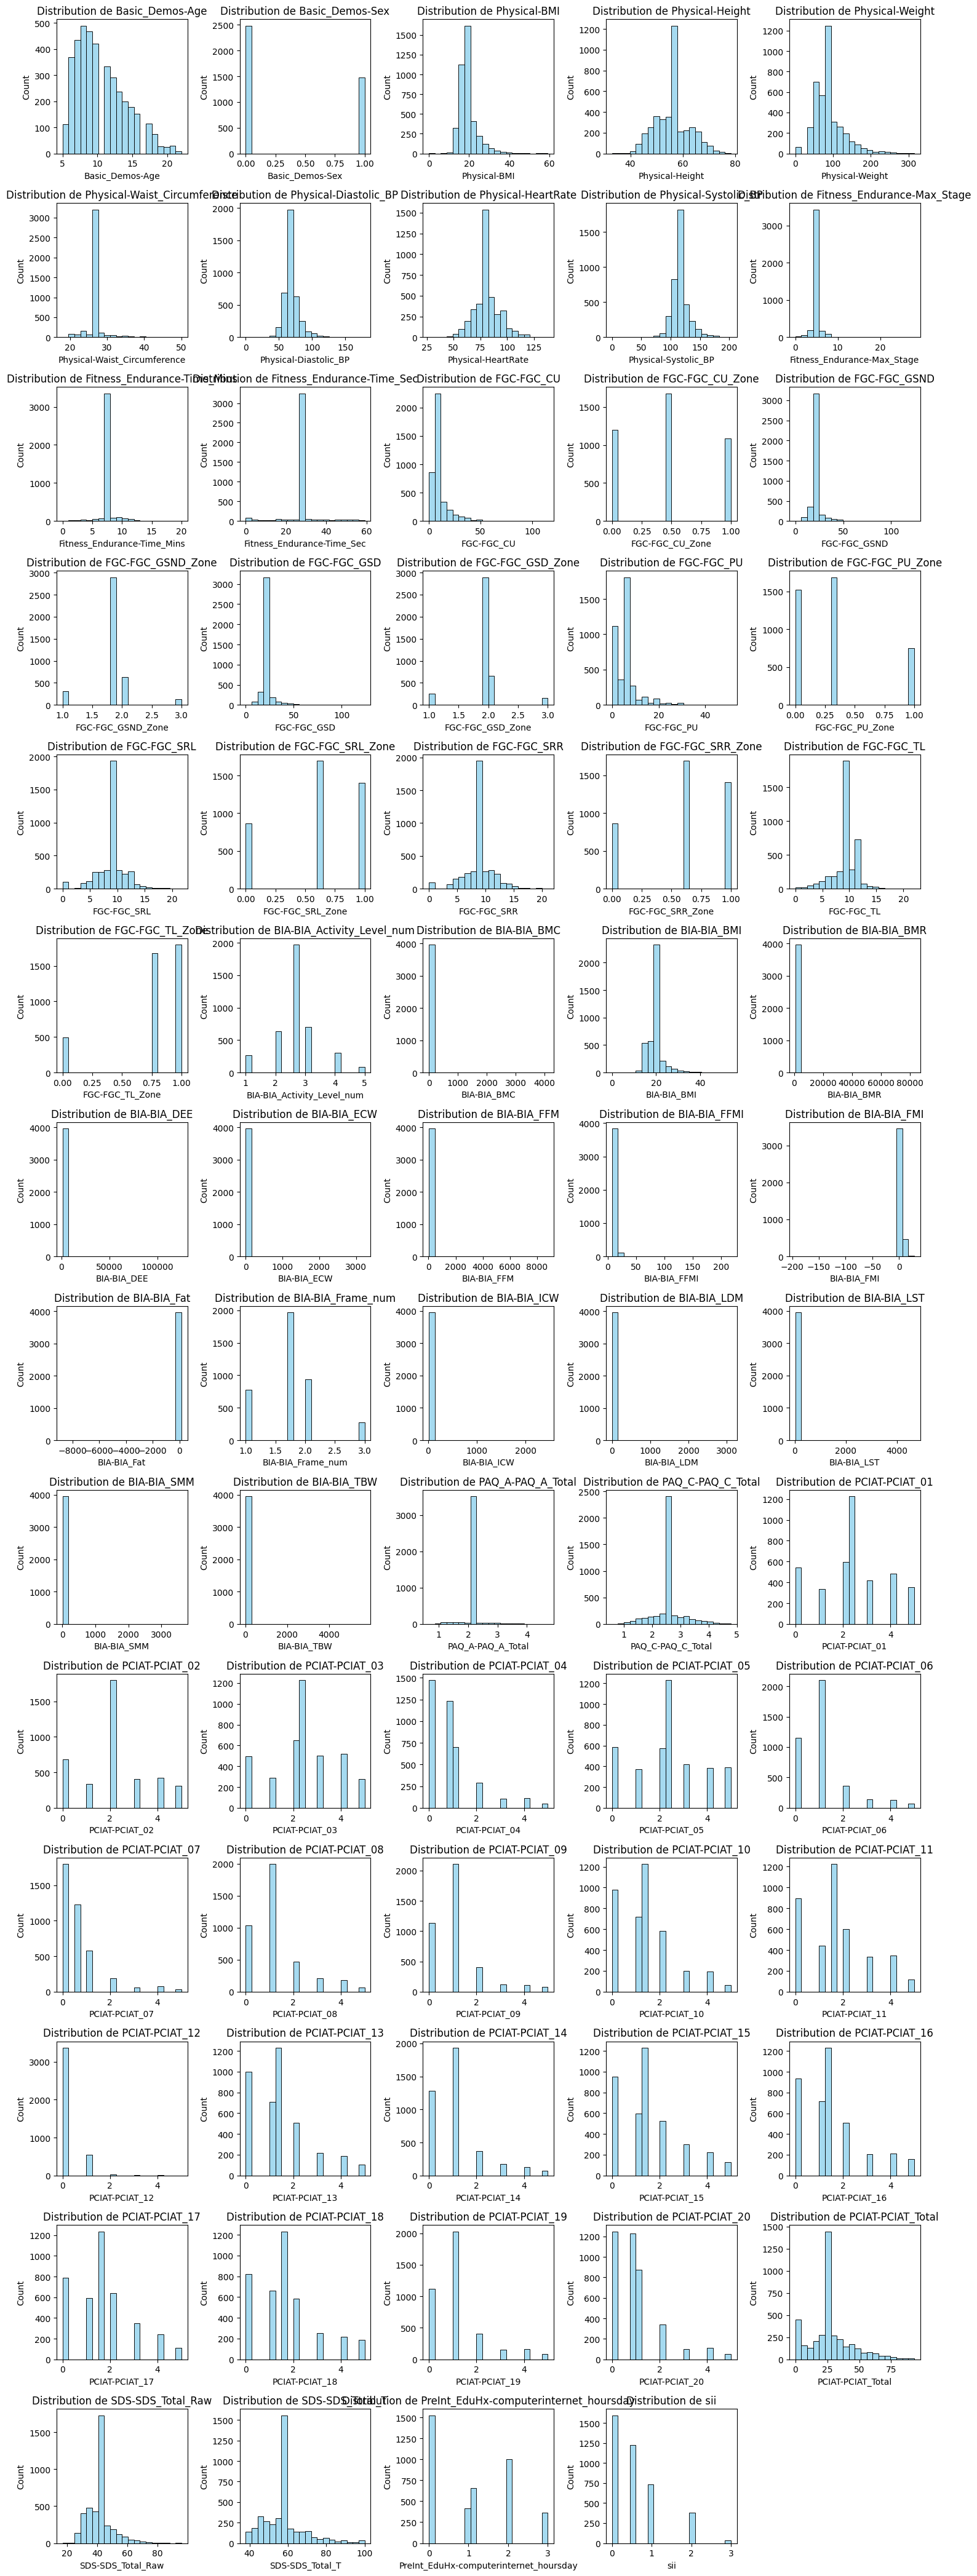

In [86]:
# histogramas para la distribución de cada variable numérica
plt.figure(figsize=(15, 3 * n_rows))  # ajustamos el tamaño de la figura para los histogramas.
for i, col in enumerate(numeric_cols, 1):  # iteramos sobre las columnas numéricas, comenzando desde 1.
    plt.subplot(n_rows, n_cols, i)  # configuramos los subgráficos en la figura.
    sns.histplot(df[col], bins=20, color='skyblue')  # creamos un histograma para cada columna con 20 bins y color 'skyblue'.
    plt.title(f'Distribution de {col}')  # asignamos un título a cada histograma, indicando la columna.
plt.tight_layout()  # ajustamos el diseño para evitar que los gráficos se superpongan.
plt.show()  # mostramos el gráfico final con los histogramas.


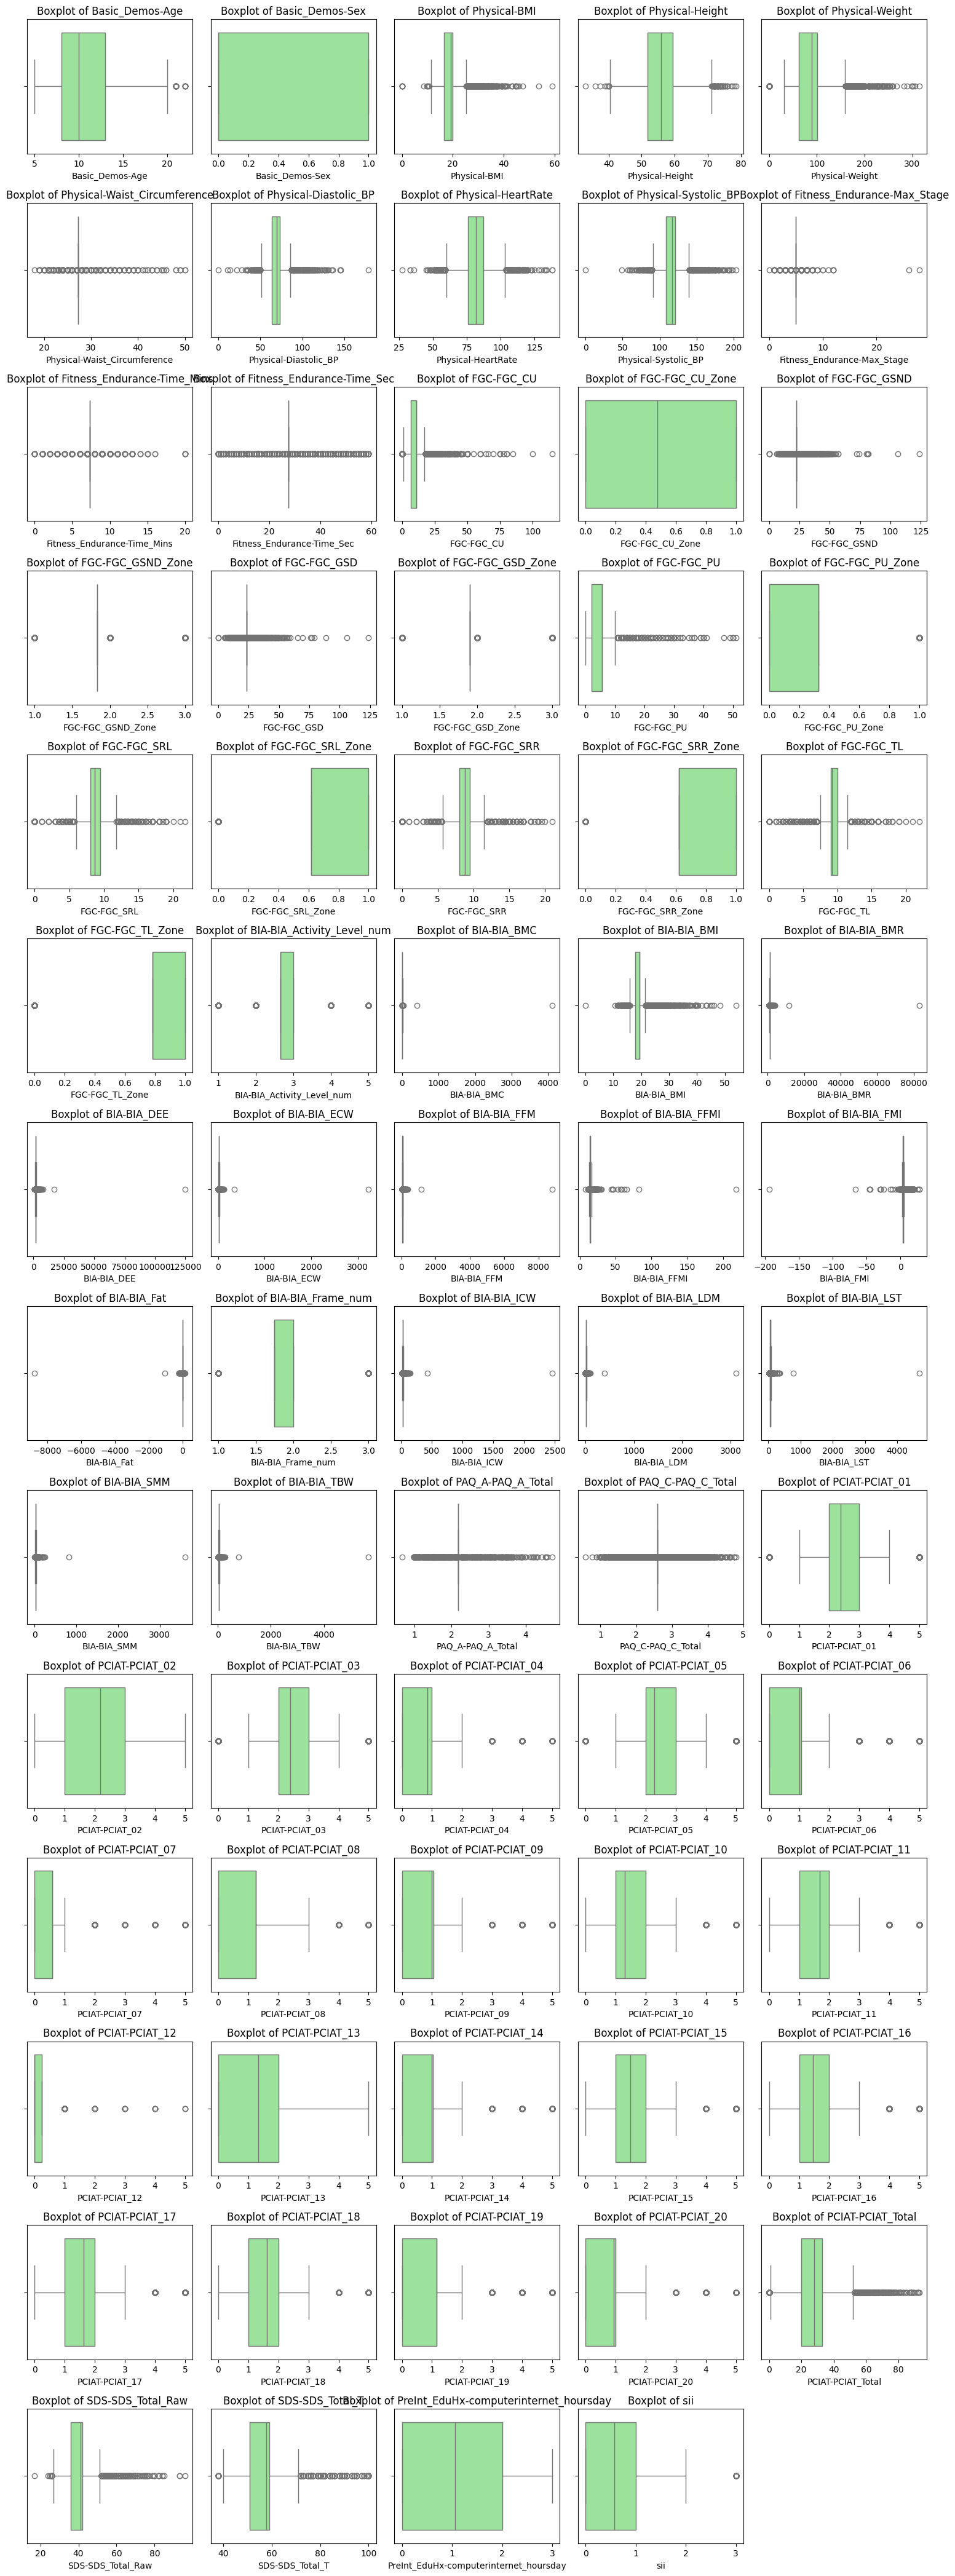

In [87]:
plt.figure(figsize=(15, 3 * n_rows))  # ajustamos el tamaño de la figura para los boxplots.
for i, col in enumerate(numeric_cols, 1):  # iteramos sobre las columnas numéricas, comenzando desde 1.
    plt.subplot(n_rows, n_cols, i)  # configuramos los subgráficos en la figura.
    sns.boxplot(x=df[col], color='lightgreen')  # creamos un boxplot para cada columna con color 'lightgreen'.
    plt.title(f'Boxplot of {col}')  # asignamos un título a cada boxplot, indicando la columna.
plt.tight_layout()  # ajustamos el diseño para evitar que los gráficos se superpongan.
plt.show()  # mostramos el gráfico final con los boxplots.


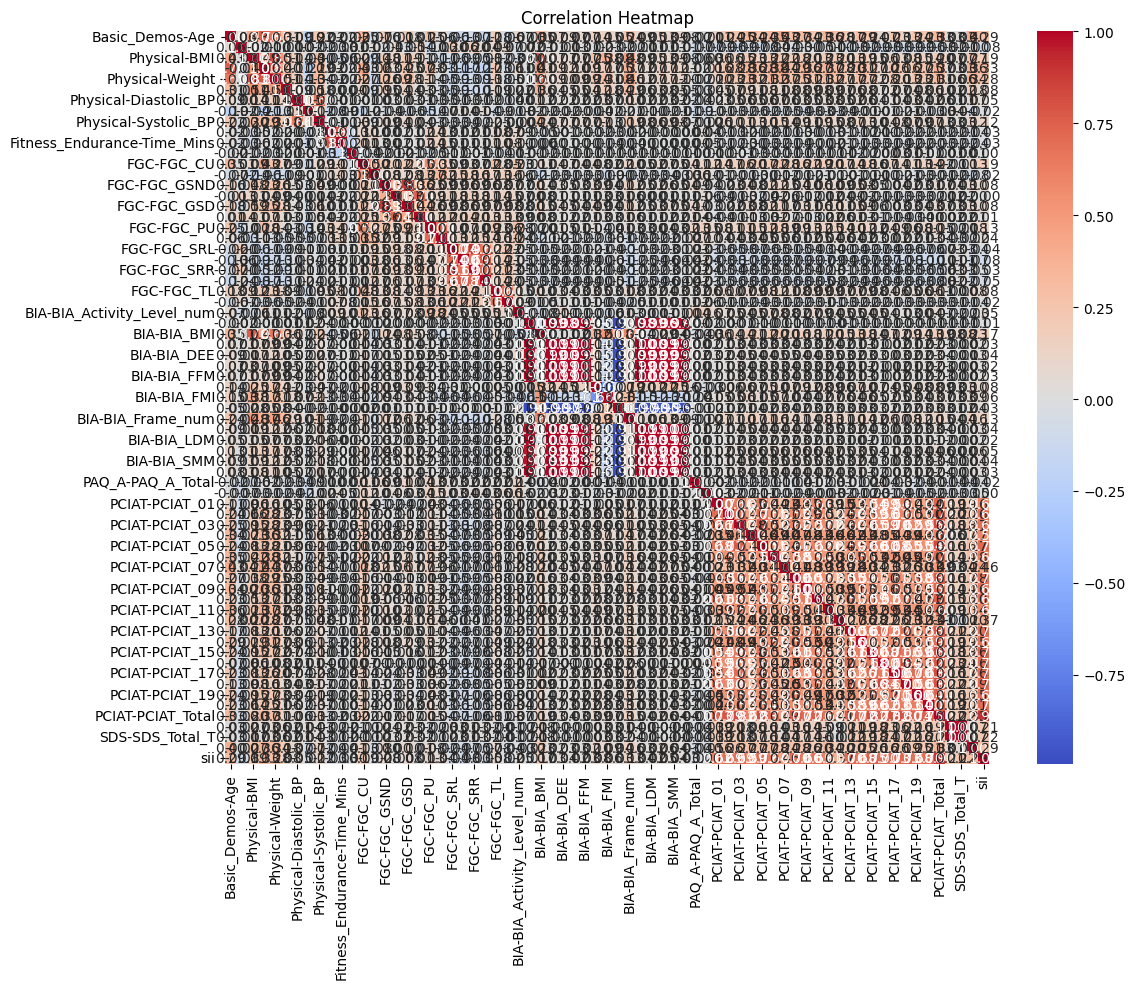

In [88]:
plt.figure(figsize=(12, 10))  # ajustamos el tamaño de la figura para el heatmap.
corr_matrix = df[numeric_cols].corr()  # calculamos la correlación entre las variables numéricas.
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)  # creamos el heatmap de correlación con anotaciones y formato numérico.
plt.title('Correlation Heatmap')  # asignamos un título al gráfico de correlación.
plt.tight_layout()  # ajustamos el diseño para evitar que los gráficos se superpongan.
plt.show()  # mostramos el gráfico final del heatmap.


In [89]:
# distribución de variables categóricas
categorical_cols = df.select_dtypes(include=['object', 'category']).columns  # seleccionamos las columnas categóricas del DataFrame.

# gráfico de barras para las variables categóricas
plt.figure(figsize=(12, 8))  # ajustamos el tamaño de la figura para los gráficos de barras.
for i, col in enumerate(categorical_cols):  # iteramos sobre las columnas categóricas.
    plt.subplot(3, 4, i + 1)  # ajustamos el número de filas y columnas para los subgráficos, según el número de variables.
    sns.countplot(data=df, x=col)  # creamos un gráfico de barras para la distribución de cada variable categórica.
    plt.title(f'Distribución de {col}')  # asignamos un título a cada gráfico de barras.
    plt.tight_layout()  # ajustamos el diseño para evitar que los gráficos se superpongan.
plt.show()  # mostramos el gráfico final con la distribución de las variables categóricas.


<Figure size 1200x800 with 0 Axes>

/tmp/ipykernel_26736/571414649.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Basic_Demos-Sex', y='Physical-BMI', data=df, palette='coolwarm')  # creamos un boxplot para mostrar la relación entre 'Sexo' y 'Physical-BMI'.


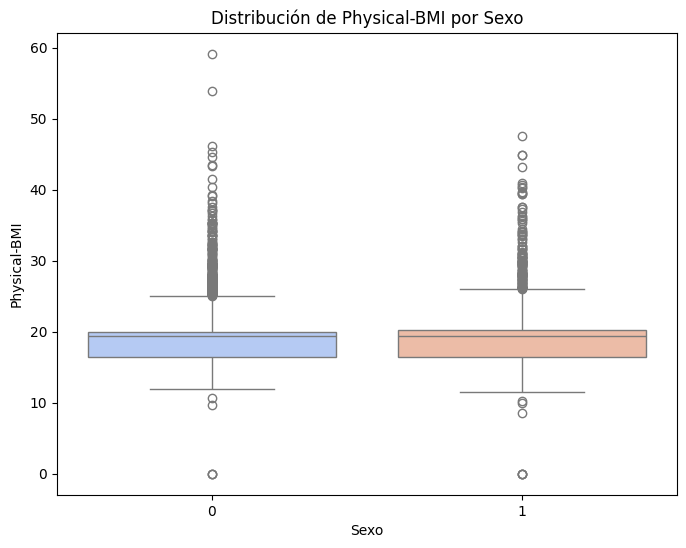

In [90]:
# relación entre variables categóricas y numéricas
# boxplot para examinar la relación entre una variable categórica y una numérica
plt.figure(figsize=(8, 6))  # ajustamos el tamaño de la figura para el boxplot.
sns.boxplot(x='Basic_Demos-Sex', y='Physical-BMI', data=df, palette='coolwarm')  # creamos un boxplot para mostrar la relación entre 'Sexo' y 'Physical-BMI'.
plt.title('Distribución de Physical-BMI por Sexo')  # asignamos un título al boxplot.
plt.xlabel('Sexo')  # etiquetamos el eje X como 'Sexo'.
plt.ylabel('Physical-BMI')  # etiquetamos el eje Y como 'Physical-BMI'.
plt.show()  # mostramos el gráfico final del boxplot.


In [91]:
# Detectar valores faltantes
# Ver la cantidad de valores faltantes por columna
missing_values = df.isnull().sum()  # calculamos la cantidad de valores nulos (faltantes) por cada columna
missing_percentage = (missing_values / len(df)) * 100  # calculamos el porcentaje de valores nulos por columna
missing_data = pd.DataFrame({'missing_values': missing_values, 'missing_percentage': missing_percentage})  
# creamos un nuevo dataframe con las columnas 'missing_values' y 'missing_percentage' para almacenar la información

# Filtrar las columnas con más del 5% de datos faltantes
missing_data = missing_data[missing_data['missing_percentage'] > 5]  # filtramos las columnas que tienen más del 5% de valores faltantes

print("Columnas con más del 5% de valores faltantes:")  # mostramos un mensaje indicando que vamos a imprimir las columnas con más del 5% de datos faltantes
print(missing_data)  # mostramos el dataframe resultante con las columnas que tienen más del 5% de datos faltantes


Columnas con más del 5% de valores faltantes:
Empty DataFrame
Columns: [missing_values, missing_percentage]
Index: []


In [92]:
# Detectar Outliers con el método IQR (Interquartile Range)
def detect_outliers_iqr(df, numeric_cols):  # definimos una función para detectar outliers usando el rango intercuartílico (IQR)
    outliers = {}  # creamos un diccionario vacío para almacenar los outliers encontrados por columna
    for col in numeric_cols:  # iteramos sobre cada columna que es numérica
        Q1 = df[col].quantile(0.25)  # calculamos el primer cuartil (Q1) de la columna
        Q3 = df[col].quantile(0.75)  # calculamos el tercer cuartil (Q3) de la columna
        IQR = Q3 - Q1  # calculamos el rango intercuartílico (IQR), que es la diferencia entre Q3 y Q1
        lower_bound = Q1 - 1.5 * IQR  # calculamos el límite inferior para detectar outliers (Q1 - 1.5 * IQR)
        upper_bound = Q3 + 1.5 * IQR  # calculamos el límite superior para detectar outliers (Q3 + 1.5 * IQR)
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]  
        # almacenamos en el diccionario los datos que están fuera de estos límites (outliers) para la columna actual
    return outliers  # devolvemos el diccionario con los outliers encontrados para todas las columnas

# Detectar outliers
outliers_iqr = detect_outliers_iqr(df, numeric_cols)  # llamamos a la función para detectar outliers y guardamos el resultado en 'outliers_iqr'
for col, outlier_data in outliers_iqr.items():  # iteramos sobre cada columna y los datos de outliers encontrados
    print(f"Outliers en {col}:")  # imprimimos un mensaje indicando la columna donde se encontraron outliers
    print(outlier_data[col])  # mostramos los valores de los outliers encontrados en la columna actual


Outliers en Basic_Demos-Age:
47      21
65      21
372     21
499     21
521     21
669     21
741     21
845     21
943     21
997     22
1045    21
1172    21
1212    21
1242    21
1282    22
1298    22
1410    21
1501    21
1522    22
1602    22
1860    21
2012    21
2022    21
2048    22
2233    21
2337    21
2345    22
2688    21
2885    21
2991    21
3010    21
3082    21
3134    21
3154    21
3161    21
3297    22
3368    21
Name: Basic_Demos-Age, dtype: int64
Outliers en Basic_Demos-Sex:
Series([], Name: Basic_Demos-Sex, dtype: int64)
Outliers en Physical-BMI:
15      29.315775
18      30.094649
21      29.285856
22      34.187282
48      32.084107
          ...    
3858    28.065268
3863    26.429967
3932    29.856520
3935    29.404637
3952    26.364710
Name: Physical-BMI, Length: 339, dtype: float64
Outliers en Physical-Height:
18      37.50
55      74.00
87      77.00
211     71.50
459     75.75
645     72.64
650     73.00
655     78.50
747     39.00
763     72.00
827     73

In [93]:
# Tratar los outliers con recorte o eliminación

# eecorte de outliers para que estén dentro de un rango aceptable (winsorización)
def winsorize_outliers(df, numerical_cols):  # definimos una función para aplicar winsorización, recortando los outliers fuera de un rango
    df_winsorized = df.copy()  # creamos una copia del dataframe original para no modificar los datos originales
    for col in numerical_cols:  # iteramos sobre cada columna numérica especificada
        Q1 = df_winsorized[col].quantile(0.25)  # calculamos el primer cuartil (Q1) de la columna
        Q3 = df_winsorized[col].quantile(0.75)  # calculamos el tercer cuartil (Q3) de la columna
        IQR = Q3 - Q1  # calculamos el rango intercuartílico (IQR), que es la diferencia entre Q3 y Q1
        lower_bound = Q1 - 1.5 * IQR  # calculamos el límite inferior para los datos aceptables (Q1 - 1.5 * IQR)
        upper_bound = Q3 + 1.5 * IQR  # calculamos el límite superior para los datos aceptables (Q3 + 1.5 * IQR)
        df_winsorized[col] = np.clip(df_winsorized[col], lower_bound, upper_bound)  
        # usamos np.clip para recortar los valores de la columna, reemplazando los outliers por los límites aceptables
    return df_winsorized  # devolvemos el dataframe con los outliers recortados

# Winsorización de outliers
df_winsorized = winsorize_outliers(df, numeric_cols)  # llamamos a la función para aplicar winsorización y guardamos el resultado

# Mostrar datos después de winsorización
print("Datos después de winsorización de outliers:")  # imprimimos un mensaje indicando que vamos a mostrar los datos modificados
print(df_winsorized.describe())  # mostramos un resumen estadístico de los datos después de haber aplicado la winsorización


Datos después de winsorización de outliers:
       Basic_Demos-Age  Basic_Demos-Sex  Physical-BMI  Physical-Height  \
count      3960.000000      3960.000000   3960.000000      3960.000000   
mean         10.426894         0.372727     18.944324        55.921173   
std           3.554845         0.483591      3.204482         6.446039   
min           5.000000         0.000000     11.156740        40.000000   
25%           8.000000         0.000000     16.487441        51.700000   
50%          10.000000         0.000000     19.331929        55.946713   
75%          13.000000         1.000000     20.041241        59.500000   
max          20.500000         1.000000     25.371942        71.200000   

       Physical-Weight  Physical-Waist_Circumference  Physical-Diastolic_BP  \
count      3960.000000                  3.960000e+03            3960.000000   
mean         87.012090                  2.727851e+01              68.932536   
std          33.072809                  1.787241e-12

# 4. Preprocesamiento de Datos:
* Transformar las columnas según sea necesario (codificación de variables categóricas, escalado de características numéricas).
* Dividir el dataset en conjuntos de entrenamiento y prueba.

In [94]:
# Codificación One-Hot para variables categóricas nominales
# Si alguna columna tiene un orden específico, puedes usar Label Encoding en lugar de One-Hot
onehot_encoder = OneHotEncoder(drop='first')

# Codificación de etiquetas (Label Encoding) para variables ordinales (si es necesario)
label_encoder = LabelEncoder()
# Escalado de características numéricas
# Estándar: Estandarización de las variables numéricas
scaler_standard = StandardScaler()

# Crear el preprocesamiento con ColumnTransformer
# Definir el preprocesador para las columnas numéricas y categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler_standard, numeric_cols),  # Escalar variables numéricas
        ('cat', label_encoder, categorical_cols)   # Codificar variables categóricas
    ])


In [95]:
# Dividir el dataset en conjunto de entrenamiento y conjunto de prueba ---
# Definir las características (X) y la variable objetivo (y)
X = df.drop(columns=['Fitness_Endurance-Max_Stage'])  # Elimina la columna objetivo de las características
y = df['Fitness_Endurance-Max_Stage']  # La columna objetivo es "Fitness_Endurance-Max_Stage"
# Dividir el dataset en conjunto de entrenamiento (80%) y conjunto de prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [96]:
# Comprobar las formas de los datos divididos
print(f"Conjunto de entrenamiento (X_train): {X_train.shape}")
print(f"Conjunto de prueba (X_test): {X_test.shape}")

Conjunto de entrenamiento (X_train): (3168, 68)
Conjunto de prueba (X_test): (792, 68)


# 5. Implementación de Modelos y Benchmark:
* Entrenar y evaluar al menos cinco modelos diferentes, como Regresión Logística, K-Nearest Neighbors (KNN), Árbol de Decisión, XGBoost y LightGBM.
* Utilizar validación cruzada para evaluar el rendimiento inicial de los modelos.
* Optimizar los hiperparámetros de los modelos seleccionados utilizando GridSearchCV o RandomizedSearchCV.
* Comparar el rendimiento de los modelos utilizando métricas adecuadas.

In [97]:
def evaluate_model(model, X_train, y_train, X_test, y_test):  # definimos una función para evaluar un modelo de regresión
    # Entrenar el modelo
    model.fit(X_train, y_train)  # entrenamos el modelo con los datos de entrenamiento (X_train, y_train)
    
    # Hacer predicciones
    y_pred = model.predict(X_test)  # usamos el modelo entrenado para hacer predicciones con los datos de prueba (X_test)
    
    # Calcular las métricas
    mse = mean_squared_error(y_test, y_pred)  # calculamos el error cuadrático medio (MSE) entre las predicciones y los valores reales
    r2 = r2_score(y_test, y_pred)  # calculamos el coeficiente de determinación R², que indica el ajuste del modelo
    mae = mean_absolute_error(y_test, y_pred)  # calculamos el error absoluto medio (MAE), que mide el error promedio de las predicciones
    
    return mse, r2, mae  # devolvemos las tres métricas (MSE, R², MAE)

# Diccionario de modelos de regresión
models = {
    'Regresión Lineal': LinearRegression(),  # modelo de regresión lineal
    'K-Vecinos (KNN)': KNeighborsRegressor(),  # modelo K-Vecinos (KNN)
    'Árbol de Decisión': DecisionTreeRegressor(),  # modelo de árbol de decisión
    'XGBoost': XGBRegressor(),  # modelo XGBoost
    'LightGBM': LGBMRegressor()  # modelo LightGBM
}

# Evaluar los modelos
results = {}  # creamos un diccionario vacío para almacenar los resultados de la evaluación
for model_name, model in models.items():  # iteramos sobre cada modelo en el diccionario de modelos
    print('='*70)  # imprimimos una línea para separar visualmente los resultados
    print(f"Evaluando {model_name}")  # mostramos el nombre del modelo que estamos evaluando
    print('-'*70)  # imprimimos otra línea de separación
    
    mse, r2, mae = evaluate_model(model, X_train, y_train, X_test, y_test)  # evaluamos el modelo con los datos de entrenamiento y prueba
    
    # Guardar resultados
    results[model_name] = {  # guardamos las métricas en el diccionario de resultados para cada modelo
        'mse': mse,
        'r2': r2,
        'mae': mae
    }
    
    # Mostrar resultados
    print(f"MSE del modelo {model_name}: {mse}")  # mostramos el MSE para el modelo actual
    print(f"R² del modelo {model_name}: {r2}")  # mostramos el R² para el modelo actual
    print(f"MAE del modelo {model_name}: {mae}")  # mostramos el MAE para el modelo actual


Evaluando Regresión Lineal
----------------------------------------------------------------------
MSE del modelo Regresión Lineal: 0.030271144562941436
R² del modelo Regresión Lineal: 0.9274515426621992
MAE del modelo Regresión Lineal: 0.1015394214661482
Evaluando K-Vecinos (KNN)
----------------------------------------------------------------------
MSE del modelo K-Vecinos (KNN): 0.6038503844017215
R² del modelo K-Vecinos (KNN): -0.4472004439770705
MAE del modelo K-Vecinos (KNN): 0.31676760879318083
Evaluando Árbol de Decisión
----------------------------------------------------------------------
MSE del modelo Árbol de Decisión: 0.03653473859945568
R² del modelo Árbol de Decisión: 0.912440082365595
MAE del modelo Árbol de Decisión: 0.02902680914123799
Evaluando XGBoost
----------------------------------------------------------------------
MSE del modelo XGBoost: 0.04402141586445341
R² del modelo XGBoost: 0.8944973552568718
MAE del modelo XGBoost: 0.05414966588540904
Evaluando LightGB

In [98]:
# Diccionario de modelos de regresión
models = {
    'Regresión Lineal': LinearRegression(),  # creamos una instancia del modelo de regresión lineal
    'K-Vecinos (KNN)': KNeighborsRegressor(),  # creamos una instancia del modelo K-Vecinos (KNN)
    'Árbol de Decisión': DecisionTreeRegressor(),  # creamos una instancia del modelo de árbol de decisión
    'XGBoost': XGBRegressor(),  # creamos una instancia del modelo XGBoost
    'LightGBM': LGBMRegressor()  # creamos una instancia del modelo LightGBM
}

# Función para evaluar los modelos con validación cruzada
def evaluate_with_cv(model, X, y, cv=5):  # definimos una función que toma un modelo, los datos de entrada (X) y las etiquetas (y), y realiza validación cruzada
    # Evaluar el modelo con validación cruzada en varias métricas
    mse_scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error')  
    # calculamos las puntuaciones del error cuadrático medio (MSE) usando validación cruzada. El MSE es negativo por defecto en 'cross_val_score'.
    
    r2_scores = cross_val_score(model, X, y, cv=cv, scoring='r2')  # calculamos las puntuaciones del coeficiente de determinación R²
    mae_scores = cross_val_score(model, X, y, cv=cv, scoring=make_scorer(mean_absolute_error))  
    # calculamos las puntuaciones del error absoluto medio (MAE) usando 'make_scorer' para convertir 'mean_absolute_error' en un puntaje
    
    # Promediar las puntuaciones de cada métrica
    mse_avg = np.mean(-mse_scores)  # calculamos el promedio del MSE, convirtiendo de nuevo el valor a positivo (ya que es negativo en cross_val_score)
    r2_avg = np.mean(r2_scores)  # calculamos el promedio del R²
    mae_avg = np.mean(mae_scores)  # calculamos el promedio del MAE
    
    return mse_avg, r2_avg, mae_avg  # devolvemos los promedios de las tres métricas de evaluación


In [99]:
# Evaluar los modelos
results = {}  # creamos un diccionario vacío para almacenar los resultados de la evaluación de cada modelo
for model_name, model in models.items():  # iteramos sobre cada modelo en el diccionario 'models', obteniendo el nombre y el modelo

    print('='*70)  # imprimimos una línea de separación visual
    print(f"Evaluando {model_name} con validación cruzada")  # mostramos el nombre del modelo que estamos evaluando con validación cruzada
    print('-'*70)  # imprimimos otra línea de separación visual
    
    mse, r2, mae = evaluate_with_cv(model, X_train, y_train)  # evaluamos el modelo usando la función 'evaluate_with_cv' con los datos de entrenamiento
    
    # Guardar los resultados
    results[model_name] = {  # guardamos las métricas de evaluación (MSE, R², MAE) en el diccionario 'results' para el modelo actual
        'mse': mse,
        'r2': r2,
        'mae': mae
    }
    
    # Mostrar resultados
    print(f"MSE promedio del modelo {model_name}: {mse}")  # mostramos el MSE promedio del modelo
    print(f"R² promedio del modelo {model_name}: {r2}")  # mostramos el R² promedio del modelo
    print(f"MAE promedio del modelo {model_name}: {mae}")  # mostramos el MAE promedio del modelo


Evaluando Regresión Lineal con validación cruzada
----------------------------------------------------------------------
MSE promedio del modelo Regresión Lineal: 0.7226797991757075
R² promedio del modelo Regresión Lineal: -0.2767982902953361
MAE promedio del modelo Regresión Lineal: 0.1338014680679333
Evaluando K-Vecinos (KNN) con validación cruzada
----------------------------------------------------------------------
MSE promedio del modelo K-Vecinos (KNN): 0.9560366836104184
R² promedio del modelo K-Vecinos (KNN): -0.21698048311959836
MAE promedio del modelo K-Vecinos (KNN): 0.33134968283792465
Evaluando Árbol de Decisión con validación cruzada
----------------------------------------------------------------------
MSE promedio del modelo Árbol de Decisión: 0.6695071082948844
R² promedio del modelo Árbol de Decisión: 0.24435224180767187
MAE promedio del modelo Árbol de Decisión: 0.07826627478019647
Evaluando XGBoost con validación cruzada
--------------------------------------------

In [104]:
# Definir los hiperparámetros a optimizar para cada modelo
param_grid_lr = {
    'linearregression__fit_intercept': [True, False]  # definimos los posibles valores del parámetro 'fit_intercept' para la regresión lineal
}

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 10],  # número de vecinos a considerar para el modelo KNN
    'weights': ['uniform', 'distance'],  # tipos de ponderación de los vecinos: uniforme o según distancia
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']  # tipos de algoritmos para calcular los vecinos más cercanos
}

param_grid_dt = {
    'max_depth': [None, 5, 10, 20],  # profundidad máxima de los árboles de decisión
    'min_samples_split': [2, 5, 10],  # número mínimo de muestras necesarias para dividir un nodo
    'min_samples_leaf': [1, 2, 4]  # número mínimo de muestras necesarias en una hoja
}

param_grid_xgb = {
    'learning_rate': [0.01, 0.05],  # tasas de aprendizaje para XGBoost
    'n_estimators': [100, 200],  # número de árboles en el modelo XGBoost
    'max_depth': [3, 6],  # profundidad máxima de los árboles
    'subsample': [0.8, 1.0]  # fracción de muestras a usar para entrenar cada árbol
}

# Crear un diccionario con los modelos y sus respectivos hiperparámetros
models = {
    'Regresión Lineal': (make_pipeline(StandardScaler(), LinearRegression()), param_grid_lr),  # modelo de regresión lineal con estandarización de datos
    'K-Vecinos (KNN)': (KNeighborsRegressor(), param_grid_knn),  # modelo K-Vecinos con su espacio de hiperparámetros
    'Árbol de Decisión': (DecisionTreeRegressor(), param_grid_dt),  # modelo de árbol de decisión con su espacio de hiperparámetros
    'XGBoost': (XGBRegressor(), param_grid_xgb)  # modelo XGBoost con su espacio de hiperparámetros
}

# Función para realizar GridSearchCV o RandomizedSearchCV
def optimize_model(model, param_grid, X_train, y_train, search_type='grid', cv=5):  
    # definimos una función para optimizar el modelo usando GridSearchCV o RandomizedSearchCV, dependiendo de la opción elegida
    if search_type == 'grid':  # si la búsqueda es de tipo 'grid', se usa GridSearchCV para búsqueda exhaustiva
        search = GridSearchCV(model, param_grid, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1)  # creamos la búsqueda con GridSearchCV
    else:  # si la búsqueda es de tipo 'random', se usa RandomizedSearchCV para búsqueda aleatoria
        search = RandomizedSearchCV(model, param_grid, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1, n_iter=20)  
        # creamos la búsqueda con RandomizedSearchCV, que realiza una búsqueda aleatoria con un número de iteraciones (n_iter)
    
    # Ajustar el modelo a los datos de entrenamiento
    search.fit(X_train, y_train)  # entrenamos el modelo usando los datos de entrenamiento y la búsqueda de hiperparámetros
    # Mejor combinación de hiperparámetros
    best_params = search.best_params_  # obtenemos los mejores parámetros encontrados durante la búsqueda
  
    # Mejor puntuación de MSE (se devuelve positivo, ya que GridSearchCV devuelve valores negativos de MSE)
    best_score = -search.best_score_  # obtenemos la mejor puntuación (MSE) y la convertimos a positivo, ya que scikit-learn devuelve un valor negativo para MSE
    
    return best_params, best_score  # devolvemos los mejores parámetros y la mejor puntuación MSE


In [105]:
# Evaluar los modelos con optimización de hiperparámetros
results = {}  # creamos un diccionario vacío para guardar los resultados de la optimización de cada modelo
for model_name, (model, param_grid) in models.items():  # iteramos sobre cada modelo y su espacio de hiperparámetros en el diccionario 'models'
    print('='*70)  # imprimimos una línea de separación visual
    print(f"Optimizando {model_name} con búsqueda de hiperparámetros...")  # mostramos el nombre del modelo que estamos optimizando
    print('-'*70)  # imprimimos otra línea de separación visual
    
    # Usar GridSearchCV o RandomizedSearchCV
    best_params, best_mse = optimize_model(model, param_grid, X_train, y_train, search_type='grid')  
    # llamamos a la función 'optimize_model' para realizar la optimización con GridSearchCV, obteniendo los mejores parámetros y el mejor MSE
    
    # Guardar los resultados
    results[model_name] = {  # guardamos los resultados de la optimización (mejores parámetros y MSE) en el diccionario 'results' para el modelo actual
        'best_params': best_params,
        'best_mse': best_mse
    }
    
    # Mostrar los resultados
    print(f"Mejores parámetros para el modelo {model_name}: {best_params}")  # mostramos los mejores parámetros encontrados para el modelo
    print(f"Mejor MSE para el modelo {model_name}: {best_mse}")  # mostramos el mejor MSE obtenido durante la optimización


Optimizando Regresión Lineal con búsqueda de hiperparámetros...
----------------------------------------------------------------------
Mejores parámetros para el modelo Regresión Lineal: {'linearregression__fit_intercept': True}
Mejor MSE para el modelo Regresión Lineal: 0.7226797993725731
Optimizando K-Vecinos (KNN) con búsqueda de hiperparámetros...
----------------------------------------------------------------------
Mejores parámetros para el modelo K-Vecinos (KNN): {'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'distance'}
Mejor MSE para el modelo K-Vecinos (KNN): 0.8972244352662347
Optimizando Árbol de Decisión con búsqueda de hiperparámetros...
----------------------------------------------------------------------
Mejores parámetros para el modelo Árbol de Decisión: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}
Mejor MSE para el modelo Árbol de Decisión: 0.3496244557607806
Optimizando XGBoost con búsqueda de hiperparámetros...
---------------------------